**Business Problem Overview**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 300)
pd.set_option("display.max_rows", 300)

In [2]:
## read data and look the intial 5 rows
telecom_df = pd.read_csv('../input/telecom3/telecom_churn_data.csv')
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
## shape of the dataset
telecom_df.shape

(99999, 226)

In [4]:
## summary of features in the dataset
telecom_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
## look at the data statistics
telecom_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,NaN,NaN,NaN,7001207270.387544,695669.38629,7000000074.0,7000606232.5,7001204632.0,7001812030.5,7002410905.0
circle_id,99999.0,NaN,NaN,NaN,109.0,0.0,109.0,109.0,109.0,109.0,109.0
loc_og_t2o_mou,98981.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,98981.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,98981.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,99999,1,6/30/2014,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_date_of_month_7,99398,1,7/31/2014,99398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_date_of_month_8,98899,1,8/31/2014,98899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_date_of_month_9,98340,1,9/30/2014,98340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,99999.0,NaN,NaN,NaN,282.987358,328.43977,-2258.709,93.4115,197.704,371.06,27731.088


In [6]:
## Percentage of null values present in data set
((telecom_df.isnull().sum()/len(telecom_df))*100).sort_values(ascending=False)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

In [7]:
## copy the data 
telecom_df_orig = telecom_df
telecom_df_orig.shape

(99999, 226)

In [8]:
## Recharge columns missing values and impue with zero as customer didn't recharge
rech_cols =  ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 
              'total_rech_amt_6','total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 
              'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
              'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
              'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
              'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 
              'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 
              'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
print("Columns are: ",rech_cols)
print("count columns are: ",len(rech_cols))

Columns are:  ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
count columns are:  32


In [9]:
## statistical summary of recharge features
telecom_df[rech_cols].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [10]:
## count of null values
telecom_df[rech_cols].isnull().sum()

total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_num_9          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
max_rech_amt_9            0
total_rech_data_6     74846
total_rech_data_7     74428
total_rech_data_8     73660
total_rech_data_9     74077
max_rech_data_6       74846
max_rech_data_7       74428
max_rech_data_8       73660
max_rech_data_9       74077
count_rech_2g_6       74846
count_rech_2g_7       74428
count_rech_2g_8       73660
count_rech_2g_9       74077
count_rech_3g_6       74846
count_rech_3g_7       74428
count_rech_3g_8       73660
count_rech_3g_9       74077
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
dtype: int64

In [11]:
# Imputing zeroes for all recharge columns
telecom_df[rech_cols] = telecom_df[rech_cols].apply(lambda x: x.fillna(0))

In [12]:
telecom_df[rech_cols].isnull().sum()

total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

In [13]:
## statistical summary of recharge columns after imputation of missing values
telecom_df[rech_cols].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,0.619726,0.681837,0.698517,0.632806,31.792048,32.406314,33.113011,32.387644,0.469025,0.522855,0.531075,0.461885,0.150702,0.158982,0.167442,0.170922,48.445409,51.393440,52.027022,49.961089
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,1.760541,1.924382,1.963417,1.669040,77.248778,78.342435,78.872739,78.818696,1.521915,1.659925,1.654565,1.371526,0.689999,0.755537,0.782059,0.774557,127.743863,132.629365,131.182609,127.804280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,17.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.250000,17.000000,23.000000,17.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [14]:
## date columns
date_cols = [col for col in telecom_df.columns if 'date' in col]
print("Date columns are: ",date_cols)
print("count of Date columns are: ",len(date_cols))

Date columns are:  ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
count of Date columns are:  12


In [15]:
## Dropping date columns as they are not required for further analysis.
print("Shape before Drop:", telecom_df.shape)
telecom_df=telecom_df.drop(date_cols, axis=1)
print("Shape After Drop:", telecom_df.shape)

Shape before Drop: (99999, 226)
Shape After Drop: (99999, 214)


In [16]:
#Drop columns with unique values , due to no variance
unique_col_n1=[]
for i in telecom_df.columns:
    if telecom_df[i].nunique() == 1:
        unique_col_n1.append(i)
        
print("\n Unique columns: \n \n",
      unique_col_n1)
print("\n Unique columns: ,\n",
      len(unique_col_n1))
print("Shape before Drop:", telecom_df.shape)
telecom_df.drop(unique_col_n1, axis=1, inplace = True)
print("Shape After Drop:", telecom_df.shape)


 Unique columns: 
 
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

 Unique columns: ,
 12
Shape before Drop: (99999, 214)
Shape After Drop: (99999, 202)


In [17]:
## Categeorical columns
cat_cols1 = [col for col in telecom_df.columns if 'night' in col]
cat_cols2 = [col for col in telecom_df.columns if 'fb' in col]
cat_cols = cat_cols1 + cat_cols2
print("Cat columns are: ",cat_cols)
print("count of Cat columns are: ",len(cat_cols))

Cat columns are:  ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
count of Cat columns are:  8


In [18]:
## Number of missing values of cat columns
telecom_df[cat_cols].isnull().sum()

night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
fb_user_6           74846
fb_user_7           74428
fb_user_8           73660
fb_user_9           74077
dtype: int64

In [19]:
# Imputing -1 for all categeorical columns
telecom_df[cat_cols] = telecom_df[cat_cols].apply(lambda x: x.fillna(-1))

In [20]:
## Number of missing values of cat columns
telecom_df[cat_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [21]:
## Percentage of null values present in data set
((telecom_df.isnull().sum()/len(telecom_df))*100).sort_values(ascending=False)

arpu_3g_6             74.846748
arpu_2g_6             74.846748
arpu_3g_7             74.428744
arpu_2g_7             74.428744
arpu_3g_9             74.077741
arpu_2g_9             74.077741
arpu_3g_8             73.660737
arpu_2g_8             73.660737
loc_og_t2c_mou_9       7.745077
loc_ic_mou_9           7.745077
spl_ic_mou_9           7.745077
isd_og_mou_9           7.745077
loc_og_t2m_mou_9       7.745077
std_og_mou_9           7.745077
loc_og_t2f_mou_9       7.745077
std_ic_mou_9           7.745077
loc_og_mou_9           7.745077
std_og_t2f_mou_9       7.745077
std_ic_t2f_mou_9       7.745077
loc_og_t2t_mou_9       7.745077
std_ic_t2t_mou_9       7.745077
std_ic_t2m_mou_9       7.745077
std_og_t2m_mou_9       7.745077
loc_ic_t2f_mou_9       7.745077
std_og_t2t_mou_9       7.745077
roam_ic_mou_9          7.745077
isd_ic_mou_9           7.745077
roam_og_mou_9          7.745077
loc_ic_t2t_mou_9       7.745077
onnet_mou_9            7.745077
spl_og_mou_9           7.745077
loc_ic_t

<AxesSubplot:>

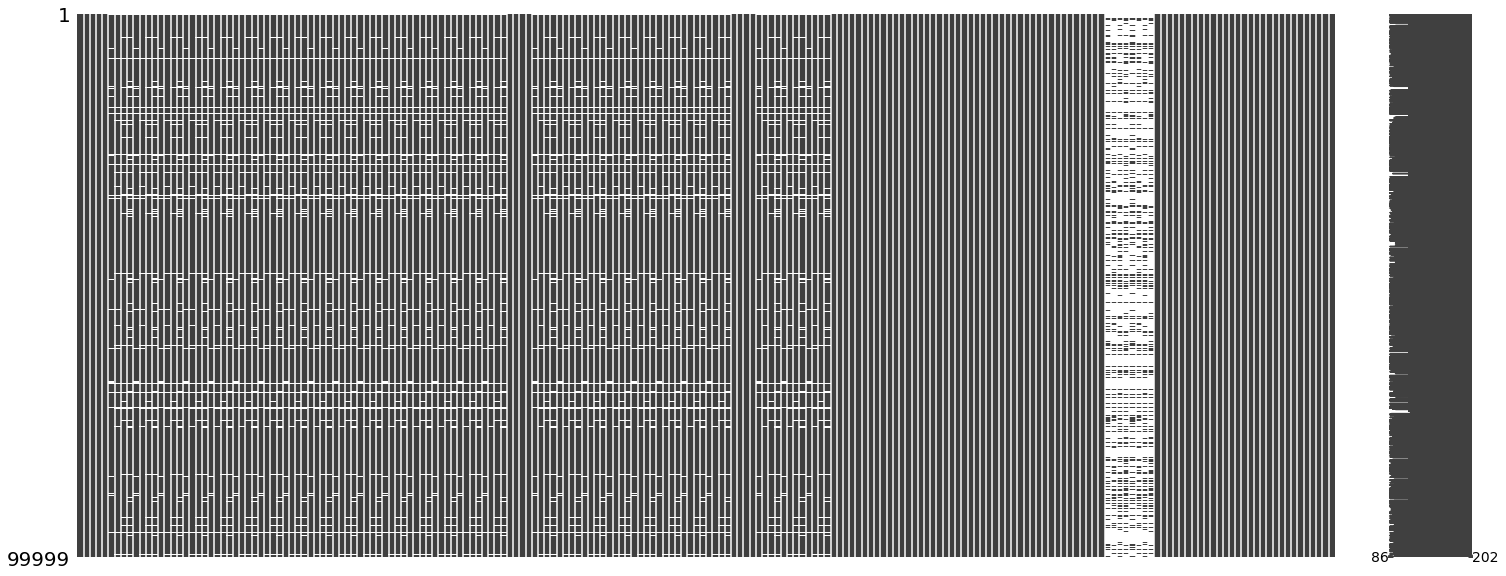

In [22]:
#!pip install missingno
import missingno as msno 
#Visualize missing values as a matrix 
msno.matrix(telecom_df) 


In [23]:
## Dropping columns whose missing values are greater than 70%
missing_val_cols = telecom_df.columns[telecom_df.isnull().mean()>0.7]
print(missing_val_cols)
print(len(missing_val_cols))
print("Shape before Drop:", telecom_df.shape)
telecom_df = telecom_df.drop(missing_val_cols, axis=1)
print("Shape After Drop:", telecom_df.shape)

Index(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9'],
      dtype='object')
8
Shape before Drop: (99999, 202)
Shape After Drop: (99999, 194)


In [24]:
## Percentage of null values present in data set
((telecom_df.isnull().sum()/len(telecom_df))*100).sort_values(ascending=False)

loc_og_t2f_mou_9      7.745077
std_og_t2t_mou_9      7.745077
loc_og_t2t_mou_9      7.745077
std_ic_t2m_mou_9      7.745077
loc_og_t2m_mou_9      7.745077
std_ic_t2t_mou_9      7.745077
loc_og_t2c_mou_9      7.745077
loc_ic_mou_9          7.745077
loc_og_mou_9          7.745077
loc_ic_t2f_mou_9      7.745077
roam_og_mou_9         7.745077
std_og_t2m_mou_9      7.745077
loc_ic_t2m_mou_9      7.745077
std_og_t2f_mou_9      7.745077
std_og_mou_9          7.745077
loc_ic_t2t_mou_9      7.745077
isd_og_mou_9          7.745077
og_others_9           7.745077
std_ic_t2f_mou_9      7.745077
spl_og_mou_9          7.745077
spl_ic_mou_9          7.745077
offnet_mou_9          7.745077
std_ic_mou_9          7.745077
ic_others_9           7.745077
roam_ic_mou_9         7.745077
isd_ic_mou_9          7.745077
onnet_mou_9           7.745077
roam_og_mou_8         5.378054
std_og_t2f_mou_8      5.378054
loc_ic_t2f_mou_8      5.378054
std_og_t2m_mou_8      5.378054
onnet_mou_8           5.378054
std_og_m

**Derive Churn**    
   
   ****9th Month is our Churn Phase. Usage-based churn****    
   ***Check Churn and drop month 9/Sep columns****   
   ****Tag churners and remove attributes of the churn phase****   

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

    total_ic_mou_9

    total_og_mou_9

    vol_2g_mb_9

    vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [25]:
##check null values of tag churners
telecom_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [26]:
## total incoming and outgoing calls, 2g and 3g  usage for churn
telecom_df['target'] = (telecom_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0).astype(int)

In [27]:
## churn ratio
print("Churn Ratio:")
telecom_df['target'].value_counts(1)*100

Churn Ratio:


0    89.808898
1    10.191102
Name: target, dtype: float64

<AxesSubplot:>

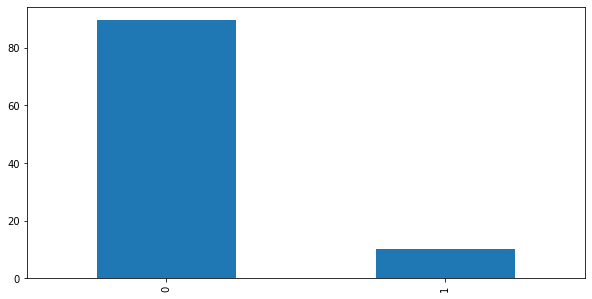

In [28]:
# lets find out churn/non churn percentage using bar plot
plt.figure(figsize=(10,5))
(telecom_df['target'].value_counts(1)*100).plot(kind='bar')

0    89.808898
1    10.191102
Name: target, dtype: float64


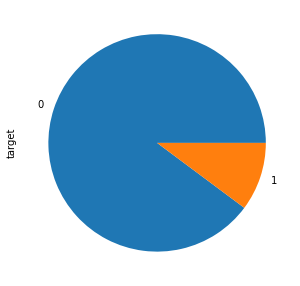

In [29]:
# lets find out churn/non churn percentage using pie plot
plt.figure(figsize=(10,5))
print((telecom_df['target'].value_counts()/len(telecom_df))*100)
((telecom_df['target'].value_counts()/len(telecom_df))*100).plot(kind="pie")
plt.show()

We can see that ~90% of the customers do not churn, there is a possibility of class imbalance


In [30]:
### Churn Month(9) columns
churn_mon_cols1 = [col for col in telecom_df.columns if '9' in col]
churn_mon_cols2 = [col for col in telecom_df.columns if 'sep' in col]
churn_mon_9cols = churn_mon_cols1 + churn_mon_cols2
print("Churn Month columns are: ",churn_mon_9cols)
print("count of Date columns are: ",len(churn_mon_9cols))

Churn Month columns are:  ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g']
count of Date columns are:  48


In [31]:
## Dropping the churn variables
print("Shape before Drop:", telecom_df.shape)
telecom_df = telecom_df.drop(churn_mon_9cols, axis=1)
print("Shape After Drop:", telecom_df.shape)

Shape before Drop: (99999, 195)
Shape After Drop: (99999, 147)


In [32]:
## Percentage of null values present in data set
((telecom_df.isnull().sum()/len(telecom_df))*100).sort_values(ascending=False).head(85)

loc_og_t2t_mou_8    5.378054
std_ic_t2t_mou_8    5.378054
std_ic_t2f_mou_8    5.378054
std_og_t2t_mou_8    5.378054
std_ic_t2m_mou_8    5.378054
loc_ic_t2f_mou_8    5.378054
loc_og_mou_8        5.378054
std_og_mou_8        5.378054
loc_og_t2c_mou_8    5.378054
std_ic_mou_8        5.378054
isd_og_mou_8        5.378054
loc_og_t2f_mou_8    5.378054
loc_og_t2m_mou_8    5.378054
spl_og_mou_8        5.378054
std_og_t2f_mou_8    5.378054
spl_ic_mou_8        5.378054
std_og_t2m_mou_8    5.378054
roam_og_mou_8       5.378054
offnet_mou_8        5.378054
ic_others_8         5.378054
loc_ic_t2m_mou_8    5.378054
onnet_mou_8         5.378054
loc_ic_t2t_mou_8    5.378054
og_others_8         5.378054
isd_ic_mou_8        5.378054
loc_ic_mou_8        5.378054
roam_ic_mou_8       5.378054
loc_ic_t2t_mou_6    3.937039
spl_og_mou_6        3.937039
isd_og_mou_6        3.937039
std_ic_t2m_mou_6    3.937039
loc_ic_t2m_mou_6    3.937039
loc_ic_mou_6        3.937039
std_ic_t2t_mou_6    3.937039
std_og_mou_6  

In [33]:
## change the data type of mobile number and target churn variables
telecom_df['mobile_number'] = telecom_df['mobile_number'].astype(object)
telecom_df['target'] = telecom_df['target'].astype(object)

In [34]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 147 entries, mobile_number to target
dtypes: float64(120), int64(25), object(2)
memory usage: 112.2+ MB


In [35]:
## getting missing values other than 0
missing_val_cols1 = telecom_df.columns[telecom_df.isnull().mean()>0.00]
print(missing_val_cols1)
print(len(missing_val_cols1))
print("Shape:", telecom_df.shape)

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [36]:
## getting the stattistical data of missing features to get insight of imputation
telecom_df[missing_val_cols1].describe().T

,count,mean,std,min,25%,50%,75%,max
onnet_mou_6,96062.0,132.395875,297.207406,0.0,7.380,34.310,118.7400,7376.71
onnet_mou_7,96140.0,133.670805,308.794148,0.0,6.660,32.330,115.5950,8157.78
onnet_mou_8,94621.0,133.018098,308.951589,0.0,6.460,32.360,115.8600,10752.56
offnet_mou_6,96062.0,197.935577,316.851613,0.0,34.730,96.310,231.8600,8362.36
offnet_mou_7,96140.0,197.045133,325.862803,0.0,32.190,91.735,226.8150,9667.13
offnet_mou_8,94621.0,196.574803,327.170662,0.0,31.630,92.140,228.2600,14007.34
roam_ic_mou_6,96062.0,9.950013,72.825411,0.0,0.000,0.000,0.0000,13724.38
roam_ic_mou_7,96140.0,7.149898,73.447948,0.0,0.000,0.000,0.0000,15371.04
roam_ic_mou_8,94621.0,7.292981,68.402466,0.0,0.000,0.000,0.0000,13095.36
roam_og_mou_6,96062.0,13.911337,71.443196,0.0,0.000,0.000,0.0000,3775.11


In [37]:
##initial records of dataset
telecom_df[missing_val_cols1].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
1,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,5.90,0.00,14.84,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0
2,11.54,55.24,37.26,143.33,220.59,208.36,0.0,0.00,0.00,0.0,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.0,135.54,45.76,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,47.64,108.68,120.94,0.0,0.0,0.0,46.56,236.84,96.84,0.45,0.0,0.0,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,139.33,306.66,239.03,0.21,0.0,0.0,0.00,0.85,0.0,0.93,3.14,0.0
3,99.91,54.39,310.98,123.31,109.01,71.68,0.0,54.86,44.38,0.0,28.09,39.04,73.68,34.81,10.61,107.43,83.21,22.46,1.91,0.65,4.91,0.0,0.00,0.00,183.03,118.68,37.99,26.23,14.89,289.58,2.99,1.73,6.53,0.00,0.00,0.00,29.23,16.63,296.11,0.0,0.0,0.0,10.96,0.00,18.09,0.00,0.0,0.0,62.08,19.98,8.04,113.96,64.51,20.28,57.43,27.09,19.84,233.48,111.59,48.18,43.48,66.44,0.00,1.33,38.56,4.94,1.18,0.00,0.00,45.99,105.01,4.94,0.59,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0
4,50.31,149.44,83.89,76.96,91.88,124.26,0.0,0.00,0.00,0.0,0.00,0.00,50.31,149.44,83.89,67.64,91.88,124.26,0.00,0.00,0.00,0.0,0.00,0.00,117.96,241.33,208.16,0.00,0.00,0.00,9.31,0.00,0.00,0.00,0.00,0.00,9.31,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,105.68,88.49,233.81,106.84,109.54,104.13,1.50,0.00,0.00,214.03,198.04,337.94,0.00,0.00,0.86,1.93,0.25,0.00,0.00,0.00,0.00,1.93,0.25,0.86,0.00,0.0,0.0,0.00,0.00,0.0,0.48,0.00,0.0


In [38]:
## Information of missing features
telecom_df[missing_val_cols1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   onnet_mou_6       96062 non-null  float64
 1   onnet_mou_7       96140 non-null  float64
 2   onnet_mou_8       94621 non-null  float64
 3   offnet_mou_6      96062 non-null  float64
 4   offnet_mou_7      96140 non-null  float64
 5   offnet_mou_8      94621 non-null  float64
 6   roam_ic_mou_6     96062 non-null  float64
 7   roam_ic_mou_7     96140 non-null  float64
 8   roam_ic_mou_8     94621 non-null  float64
 9   roam_og_mou_6     96062 non-null  float64
 10  roam_og_mou_7     96140 non-null  float64
 11  roam_og_mou_8     94621 non-null  float64
 12  loc_og_t2t_mou_6  96062 non-null  float64
 13  loc_og_t2t_mou_7  96140 non-null  float64
 14  loc_og_t2t_mou_8  94621 non-null  float64
 15  loc_og_t2m_mou_6  96062 non-null  float64
 16  loc_og_t2m_mou_7  96140 non-null  float6

**Missing values imputation using KNN**

In [39]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 147 entries, mobile_number to target
dtypes: float64(120), int64(25), object(2)
memory usage: 112.2+ MB


In [40]:
## Impute missing values with kNN
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import time

# Numerical columns available
num_cols = telecom_df.select_dtypes(include = ['int64','float64']).columns.tolist()

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
telecom_df[num_cols]=scalar.fit_transform(telecom_df[num_cols])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
start_time=time.time()

telecom_data_knn = pd.DataFrame(knn.fit_transform(telecom_df[num_cols]))
telecom_data_knn.columns=telecom_df[num_cols].columns

end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds\n")


Execution Time =  1699.55 seconds



In [42]:
##check for null values after imputation
telecom_data_knn.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8    

In [43]:
# Converting the scaled data back to the original data
telecom_df[num_cols]=scalar.inverse_transform(telecom_data_knn)

In [44]:
# checking intial 10 rows
telecom_df.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,target
0,7000842753,197.385,214.816,213.803,8.576667,20.983333,0.00,41.783333,66.966667,0.00,0.00,8.18,0.00,0.00,8.146667,0.00,8.576667,14.826667,0.00,10.173333,9.283333,0.00,0.266667,0.00,0.00,0.943333,0.00,0.00,19.016667,24.116667,0.00,0.00,0.00,0.00,30.396667,55.686667,0.00,0.00,0.00,0.00,30.396667,55.686667,0.00,0.0,0.00,0.00,0.943333,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,9.003333,5.38,0.16,31.89,9.82,4.13,0.21,0.953333,1.15,41.11,16.16,5.44,0.06,0.82,0.00,5.126667,3.186667,0.00,0.126667,0.00,0.00,5.313333,4.006667,0.00,0.00,0.00,5.44,0.026667,0.026667,0.00,0.00,4.216667,0.00,0.026667,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1
1,7001865778,34.047,355.074,268.321,24.110000,78.680000,7.68,15.740000,99.840000,304.76,0.00,0.00,0.00,0.00,0.000000,0.00,23.880000,74.560000,7.68,11.510000,75.940000,291.86,0.000000,0.00,0.00,0.000000,2.91,0.00,35.390000,150.510000,299.54,0.23,4.11,0.00,0.000000,0.460000,0.13,0.00,0.00,0.00,0.230000,4.580000,0.13,0.0,0.00,0.00,4.680000,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.610000,29.91,29.23,17.48,65.38,375.58,0.00,8.930000,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.900000,0.000000,12.49,0.000000,0.00,0.00,5.900000,0.000000,14.84,26.83,104.23,423.28,0.000000,0.000000,0.00,1.83,0.000000,0.00,0.000000,0.00,0.00,4.0,9.0,11.0,74.0,384.0,283.0,44.0,154.0,65.0,44.0,23.0,30.0,0.0,1.0,2.0,0.0,154.0,25.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,1006.0,0.00,0.00,0.00,0
2,7001625959,167.690,189.058,210.226,11.540000,55.240000,37.26,143.330000,220.590000,208.36,0.00,0.00,0.00

In [45]:
# checking null values
((telecom_df.isnull().sum()/telecom_df.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number         0.0
count_rech_2g_7       0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
spl_ic_mou_6          0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
spl_ic_mou_7          0.0
ic_others_8           0.0
spl_ic_mou_8          0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
ic_others_6           0.0
ic_others_7           0.0
count_rech_2g_6       0.0
count_rech_2g_8       0.0
std_ic_t2f_mou_7      0.0
count_rech_3

In [46]:
## 6th month features
mon_6_cols1 = [col for col in telecom_df.columns if '_6' in col]
mon_6_cols2 = [col for col in telecom_df.columns if '_jun' in col]
mon_6_cols = mon_6_cols1 + mon_6_cols2
print("6th Month columns are: ",mon_6_cols)
print("count of 6th Month columns are: ",len(mon_6_cols))


6th Month columns are:  ['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'fb_user_6']
count of 6th Month columns are:  47


In [48]:
#Statiscal summary of 6th month columns
telecom_df[mon_6_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,99999.0,282.987358,328.439770,-2258.709,93.4115,197.704000,371.06,27731.088
onnet_mou_6,99999.0,128.113496,292.504302,0.000,6.8300,32.130000,113.49,7376.710
offnet_mou_6,99999.0,191.745134,312.295338,0.000,31.8900,90.990000,223.21,8362.360
roam_ic_mou_6,99999.0,9.894514,71.842712,0.000,0.0000,0.000000,0.00,13724.380
roam_og_mou_6,99999.0,13.780451,70.282978,0.000,0.0000,0.000000,0.00,3775.110
loc_og_t2t_mou_6,99999.0,45.518582,148.106586,0.000,1.5000,11.110000,39.03,6431.330
loc_og_t2m_mou_6,99999.0,90.371703,160.317151,0.000,8.9400,38.580000,106.18,4729.740
loc_og_t2f_mou_6,99999.0,3.644825,13.969290,0.000,0.0000,0.000000,1.98,1466.030
loc_og_t2c_mou_6,99999.0,1.096544,5.348078,0.000,0.0000,0.000000,0.00,342.860
loc_og_mou_6,99999.0,139.542272,247.954130,0.000,15.4800,60.960000,162.49,10643.380


<AxesSubplot:xlabel='target', ylabel='arpu_8'>

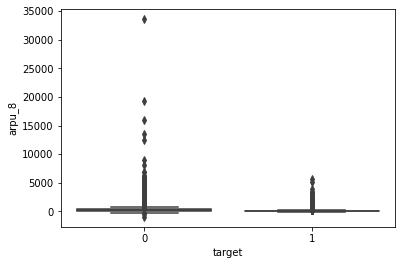

In [49]:
## Box Plot
sns.boxplot(x='target',y='arpu_8',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='total_rech_num_6'>

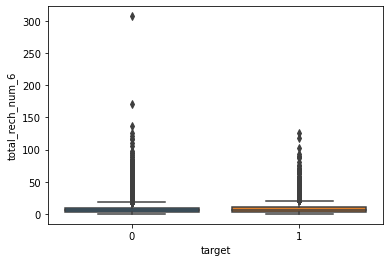

In [50]:
sns.boxplot(x='target',y='total_rech_num_6',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='max_rech_amt_6'>

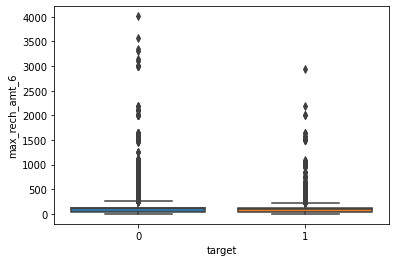

In [51]:
sns.boxplot(x='target',y='max_rech_amt_6',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='ic_others_6'>

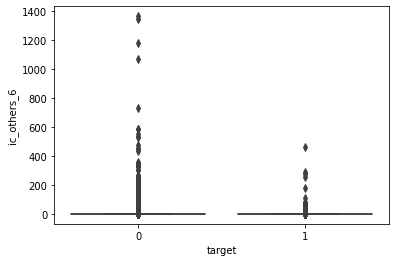

In [52]:
sns.boxplot(x='target',y='ic_others_6',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='last_day_rch_amt_6'>

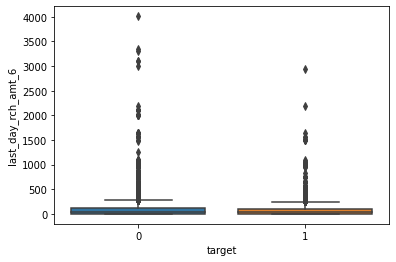

In [53]:
sns.boxplot(x='target',y='last_day_rch_amt_6',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='total_og_mou_6'>

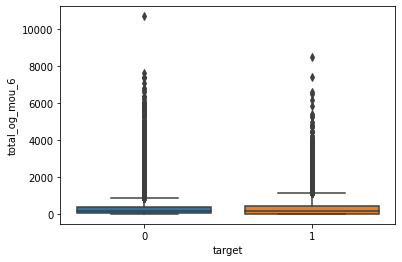

In [54]:
sns.boxplot(x='target',y='total_og_mou_6',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='loc_og_mou_6'>

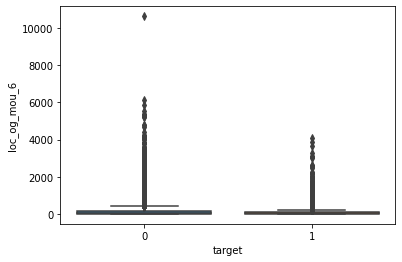

In [55]:
sns.boxplot(x='target',y='loc_og_mou_6',data=telecom_df)

In [56]:
##  7th month features
mon_7_cols1 = [col for col in telecom_df.columns if '_7' in col]
mon_7_cols2 = [col for col in telecom_df.columns if '_jul' in col]
mon_7_cols = mon_7_cols1 + mon_7_cols2
print("7th Month columns are: ",mon_7_cols)
print("count of 7th Month columns are: ",len(mon_7_cols))


7th Month columns are:  ['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'night_pck_user_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'fb_user_7']
count of 7th Month columns are:  47


In [57]:
## Statiscal summary of 7th month columns
telecom_df[mon_7_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_7,99999.0,278.536648,338.156291,-2014.045,86.980500,191.64,365.344500,35145.834
onnet_mou_7,99999.0,129.074659,303.717886,0.000,5.940000,29.94,109.290000,8157.780
offnet_mou_7,99999.0,190.614135,321.253106,0.000,28.890000,86.24,218.280000,9667.130
roam_ic_mou_7,99999.0,7.121529,74.083384,0.000,0.000000,0.00,0.000000,15371.040
roam_og_mou_7,99999.0,9.659792,57.397111,0.000,0.000000,0.00,0.000000,2812.040
loc_og_t2t_mou_7,99999.0,44.900396,152.524339,0.000,1.400000,10.73,38.090000,7400.660
loc_og_t2m_mou_7,99999.0,88.467242,155.219303,0.000,8.851667,37.91,103.720000,4557.140
loc_og_t2f_mou_7,99999.0,3.692761,14.012220,0.000,0.000000,0.00,2.010000,1196.430
loc_og_t2c_mou_7,99999.0,1.336557,7.395905,0.000,0.000000,0.00,0.000000,916.240
loc_og_mou_7,99999.0,137.067585,245.092946,0.000,15.410000,59.69,158.430000,7674.780


<AxesSubplot:xlabel='target', ylabel='arpu_7'>

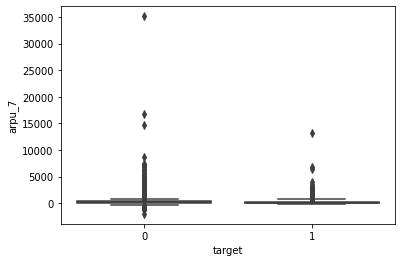

In [58]:
sns.boxplot(x='target',y='arpu_7',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='total_og_mou_7'>

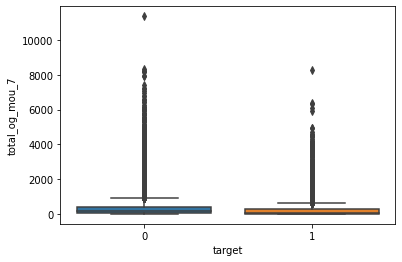

In [59]:
sns.boxplot(x='target',y='total_og_mou_7',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='total_rech_num_7'>

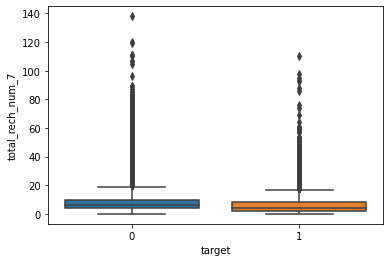

In [60]:
sns.boxplot(x='target',y='total_rech_num_7',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='total_rech_amt_7'>

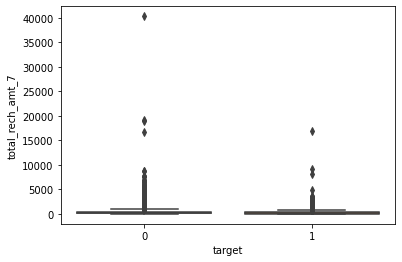

In [61]:
sns.boxplot(x='target',y='total_rech_amt_7',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='max_rech_amt_7'>

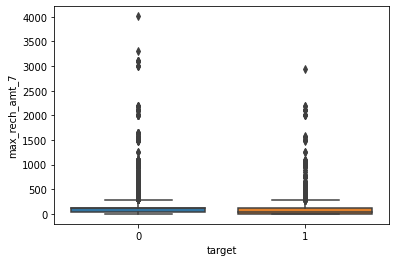

In [62]:
sns.boxplot(x='target',y='max_rech_amt_7',data=telecom_df)

In [63]:
##  8th month features
mon_8_cols1 = [col for col in telecom_df.columns if '_8' in col]
mon_8_cols2 = [col for col in telecom_df.columns if '_aug' in col]
mon_8_cols = mon_8_cols1 + mon_8_cols2
print("8th Month columns are: ",mon_8_cols)
print("count of 8th Month columns are: ",len(mon_8_cols))

8th Month columns are:  ['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8']
count of 8th Month columns are:  47


In [64]:
## Statiscal summary of 8th month columns
telecom_df[mon_8_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_8,99999.0,279.154731,344.474791,-945.808,84.126000,192.08,369.3705,33543.624
onnet_mou_8,99999.0,126.903870,301.848797,0.000,5.660000,29.31,107.8000,10752.560
offnet_mou_8,99999.0,188.115155,320.743557,0.000,27.480000,84.88,216.7850,14007.340
roam_ic_mou_8,99999.0,7.193388,68.371725,0.000,0.000000,0.00,0.0000,13095.360
roam_og_mou_8,99999.0,9.711935,63.061896,0.000,0.000000,0.00,0.0000,5337.040
loc_og_t2t_mou_8,99999.0,43.836463,147.429137,0.000,1.330000,10.59,37.8300,10752.560
loc_og_t2m_mou_8,99999.0,87.907263,153.552916,0.000,8.396667,37.08,103.6300,4961.330
loc_og_t2f_mou_8,99999.0,3.539700,12.943883,0.000,0.000000,0.00,1.9300,928.490
loc_og_t2c_mou_8,99999.0,1.390104,6.616966,0.000,0.000000,0.00,0.0000,502.090
loc_og_mou_8,99999.0,135.290491,241.057255,0.000,14.630000,58.36,158.2900,11039.910


<AxesSubplot:xlabel='target', ylabel='arpu_8'>

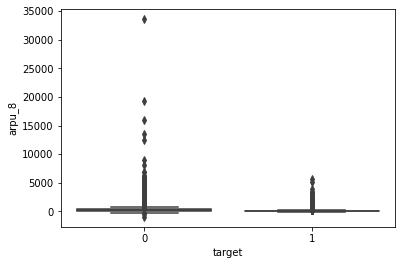

In [65]:
sns.boxplot(x='target',y='arpu_8',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='total_og_mou_8'>

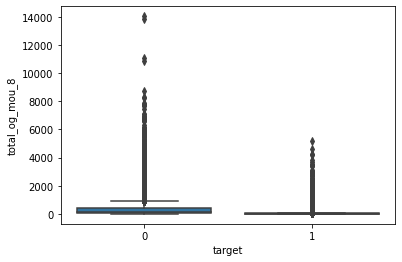

In [66]:
sns.boxplot(x='target',y='total_og_mou_8',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='total_ic_mou_8'>

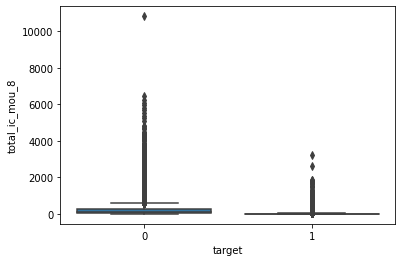

In [67]:
sns.boxplot(x='target',y='total_ic_mou_8',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='total_rech_num_8'>

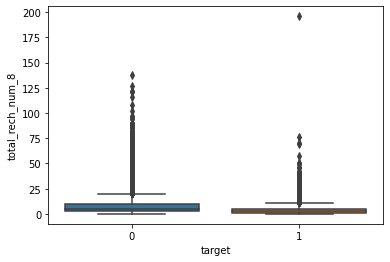

In [68]:
sns.boxplot(x='target',y='total_rech_num_8',data=telecom_df)

<AxesSubplot:xlabel='target', ylabel='total_rech_amt_8'>

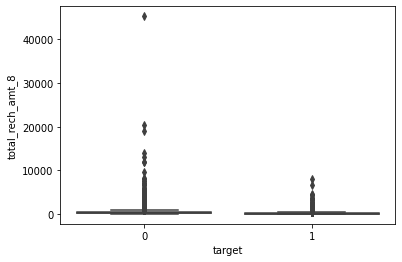

In [69]:
sns.boxplot(x='target',y='total_rech_amt_8',data=telecom_df)

In [72]:
## Percentage of null values present in data set
((telecom_df.isnull().sum()/len(telecom_df))*100).sort_values(ascending=False).head(5)

mobile_number       0.0
count_rech_2g_7     0.0
total_rech_amt_6    0.0
total_rech_amt_7    0.0
total_rech_amt_8    0.0
dtype: float64

In [73]:
telecom_df['mobile_number'] = pd.to_numeric(telecom_df['mobile_number'])
telecom_df['target'] = pd.to_numeric(telecom_df['target'])

Text(0.5, 1.0, 'Features correlation with target variable(target):')

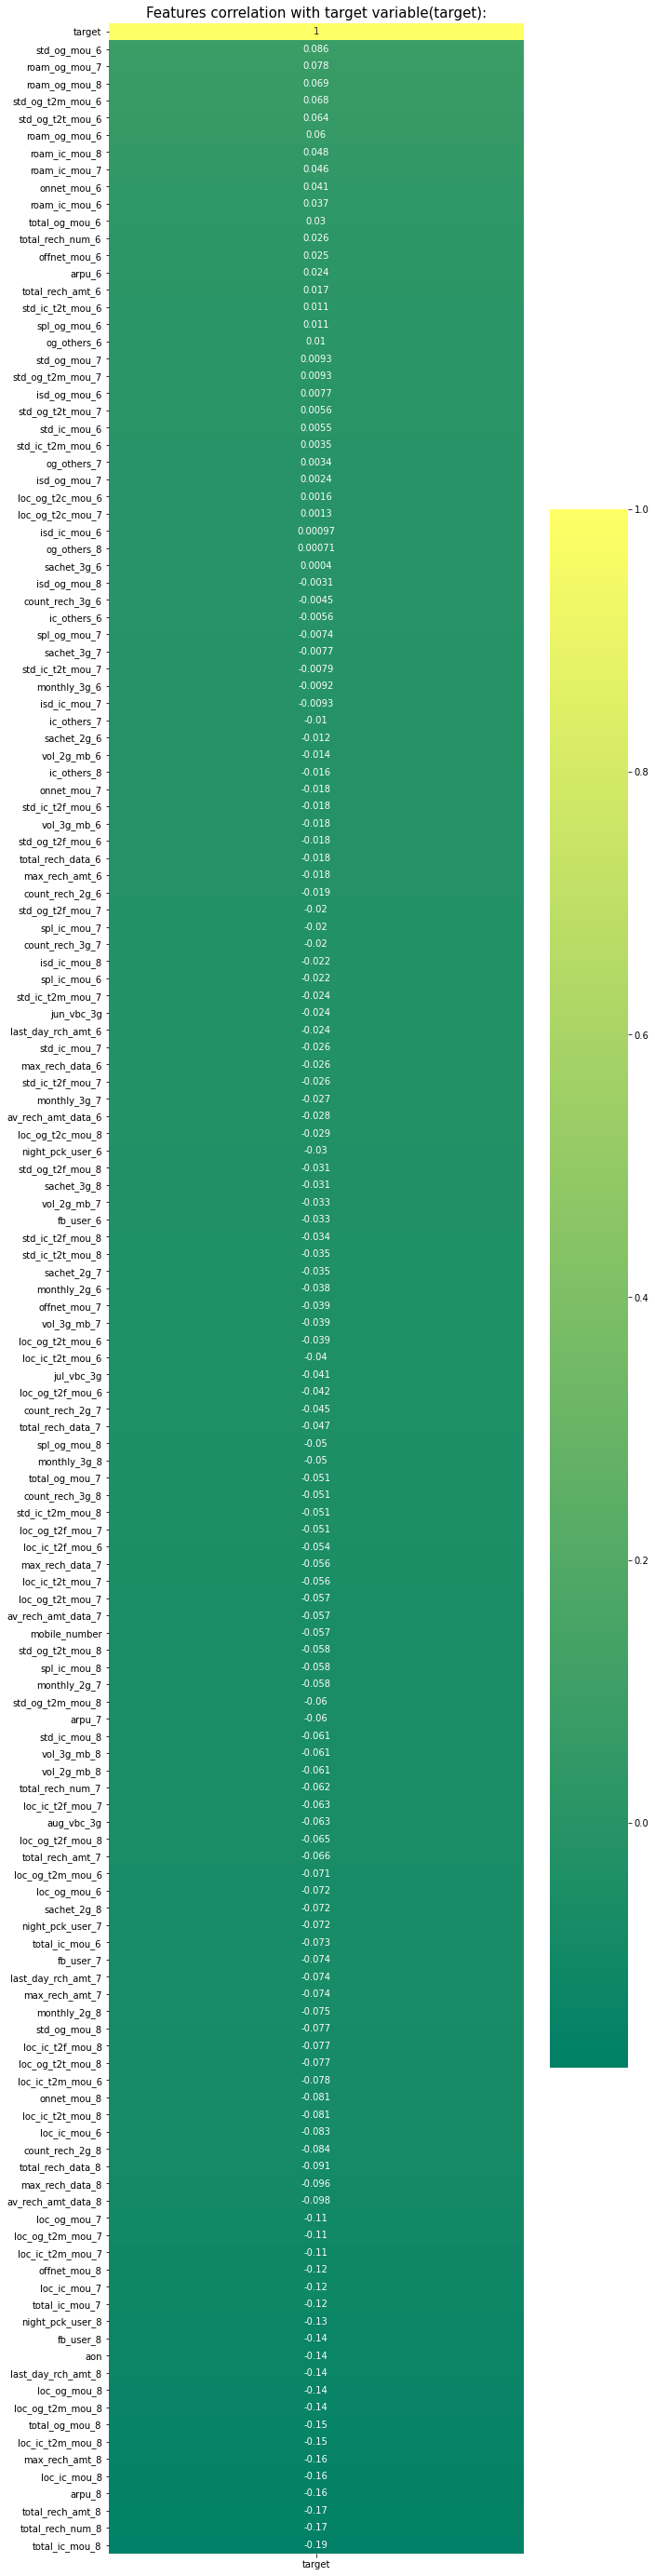

In [75]:
# Checking Correlation between target variable
plt.figure(figsize=(10,50))
hm = sns.heatmap(telecom_df.corr()[['target']].sort_values(ascending=False, by='target'),annot=True, 
                                cmap='summer')
hm.set_title("Features correlation with target variable(target):", fontsize=15)

Average Outgoing, incoming, revenue and recharges of 8th Month are negatively correlated to target variable.       
Average Incoming,outgoing,data services and roaming of 6th and 7th Month(s) are positively correlated    


<AxesSubplot:xlabel='total_rech_num_8', ylabel='arpu_8'>

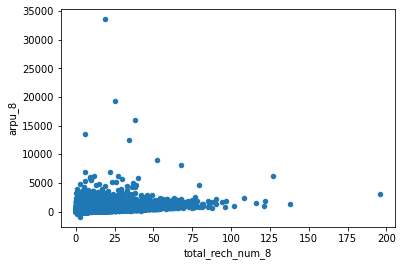

In [76]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
telecom_df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

<AxesSubplot:xlabel='total_rech_num_6', ylabel='arpu_6'>

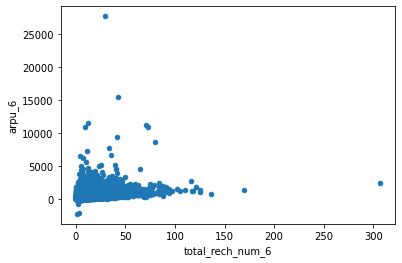

In [78]:
# lets now draw a scatter plot between total recharge and avg revenue for the 6th month
telecom_df[['total_rech_num_6', 'arpu_6']].plot.scatter(x = 'total_rech_num_6',
                                                              y='arpu_6')

<AxesSubplot:xlabel='total_rech_num_7', ylabel='arpu_7'>

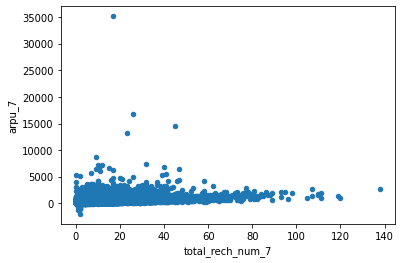

In [79]:
# lets now draw a scatter plot between total recharge and avg revenue for the 7th month
telecom_df[['total_rech_num_7', 'arpu_7']].plot.scatter(x = 'total_rech_num_7',
                                                              y='arpu_7')

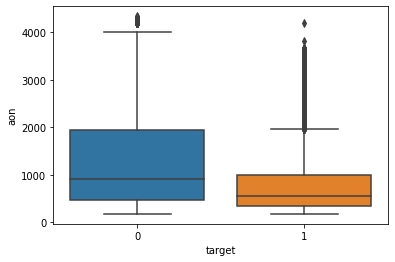

In [80]:
sns.boxplot(x = telecom_df.target, y = telecom_df.aon)
plt.show()

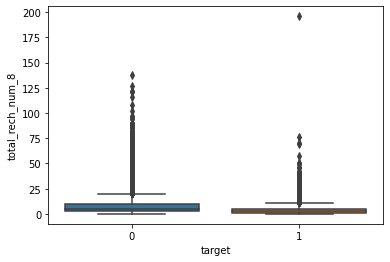

In [81]:
sns.boxplot(x = telecom_df.target, y = telecom_df.total_rech_num_8)
plt.show()

**Filter High-value customers**

*As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).*

In [82]:
## total data recharge amount for 6 & 7 months
telecom_df['total_data_rech_6'] = telecom_df['total_rech_data_6'] * telecom_df['av_rech_amt_data_6']
telecom_df['total_data_rech_7'] = telecom_df['total_rech_data_7'] * telecom_df['av_rech_amt_data_7']

## total recharge amount for 6 & 7 months
telecom_df['total_amt_data_6'] = telecom_df.total_rech_amt_6 + telecom_df.total_data_rech_6
telecom_df['total_amt_data_7'] = telecom_df.total_rech_amt_7 + telecom_df.total_data_rech_7

## Average recharges done by customers in the months of 6 & 7 
telecom_df['av_amt_data_rech_6_7']=(telecom_df.total_amt_data_6 + telecom_df.total_amt_data_7)/2

In [83]:
# statiscal summary of average recharges done by customers in the months of 6 & 7 
telecom_df['av_amt_data_rech_6_7'].describe(include='all')

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
Name: av_amt_data_rech_6_7, dtype: float64

In [84]:
## check for 70th percentile of Average recharges done by customers in the months of 6 & 7 
print(telecom_df.av_amt_data_rech_6_7.quantile(0.7))

478.0


In [85]:
# retaining only those customers who have recharged more than or equal to 70th percentile
telecom_df_hv = telecom_df.loc[telecom_df.av_amt_data_rech_6_7 >= telecom_df.av_amt_data_rech_6_7.quantile(0.7), :]
telecom_df_hv = telecom_df_hv.reset_index(drop=True)
telecom_df_hv.shape

(30001, 152)

In [86]:
## Dropping the derived variables
print("Shape before Drop:", telecom_df_hv.shape)
telecom_df_hv = telecom_df_hv.drop(['total_data_rech_6','total_data_rech_7','total_amt_data_6','total_amt_data_7','av_amt_data_rech_6_7'], axis=1)
print("Shape After Drop:", telecom_df_hv.shape)

Shape before Drop: (30001, 152)
Shape After Drop: (30001, 147)


In [87]:
telecom_df_hv1 =telecom_df_hv

In [88]:
telecom_df_hv1.shape

(30001, 147)

In [91]:
telecom_df_hv2 = telecom_df_hv1

In [100]:
telecom_df_hv = telecom_df_hv2

In [106]:
telecom_df_hv.shape

(30001, 147)

In [102]:
telecom_df_hv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 147 entries, mobile_number to target
dtypes: float64(145), int64(2)
memory usage: 33.6 MB


In [107]:
# Removing outliers below 10th and above 90th percentile

## change the data type of mobile number and target churn variables
telecom_df_hv['mobile_number'] = telecom_df_hv['mobile_number'].astype(object)
telecom_df_hv['target'] = telecom_df_hv['target'].astype(object)

# List only the numeric columns
numeric_cols = telecom_df_hv.select_dtypes(exclude=['object']).columns
print(numeric_cols)
print(len(numeric_cols))

for col in numeric_cols: 
    q1 = telecom_df_hv[col].quantile(0.10)
    q3 = telecom_df_hv[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    final_df = telecom_df_hv.loc[(telecom_df_hv[col] > range_low) & (telecom_df_hv[col] < range_high)]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=145)
145


In [109]:
final_df.shape

(29283, 147)

### Calculate difference between 8th Month variables with 6th and 7th month(s) variables.

In [110]:
# Looking at the dataset derived following variables.

final_df['arpu_diff'] = final_df.arpu_8 - ((final_df.arpu_6 + final_df.arpu_7 )/2)
final_df['onnet_mou_diff'] = final_df.onnet_mou_8 - ((final_df.onnet_mou_6 + final_df.onnet_mou_7)/2)
final_df['offnet_mou_diff'] = final_df.offnet_mou_8 - ((final_df.offnet_mou_6 + final_df.offnet_mou_7)/2)
final_df['offnet_mou_diff'] = final_df.offnet_mou_8 - ((final_df.offnet_mou_6 + final_df.offnet_mou_7)/2)
final_df['roam_ic_mou_diff'] = final_df.roam_ic_mou_8 - ((final_df.roam_ic_mou_6 + final_df.roam_ic_mou_7)/2)
final_df['roam_og_mou_diff'] = final_df.roam_og_mou_8 - ((final_df.roam_og_mou_6 + final_df.roam_og_mou_7)/2)
final_df['loc_og_t2t_mou_diff'] = final_df.loc_og_t2t_mou_8 - ((final_df.loc_og_t2t_mou_6 + final_df.loc_og_t2t_mou_7)/2)
final_df['loc_og_t2m_mou_diff'] = final_df.loc_og_t2m_mou_8 - ((final_df.loc_og_t2m_mou_6 + final_df.loc_og_t2m_mou_7 )/2)
final_df['loc_og_t2f_mou_diff'] = final_df.loc_og_t2f_mou_8 - ((final_df.loc_og_t2f_mou_6 + final_df.loc_og_t2f_mou_7 )/2)
final_df['loc_og_t2c_mou_diff'] = final_df.loc_og_t2c_mou_8 - ((final_df.loc_og_t2c_mou_6 + final_df.loc_og_t2c_mou_7 )/2)
final_df['loc_og_mou_diff'] = final_df.loc_og_mou_8 - ((final_df.loc_og_mou_6 + final_df.loc_og_mou_7 )/2)
final_df['std_og_t2t_mou_diff'] = final_df.std_og_t2t_mou_8 - ((final_df.std_og_t2t_mou_6 + final_df.std_og_t2t_mou_7 )/2)
final_df['std_og_t2m_mou_diff'] = final_df.std_og_t2m_mou_8 - ((final_df.std_og_t2m_mou_6 + final_df.std_og_t2m_mou_7 )/2)
final_df['std_og_t2f_mou_diff'] = final_df.std_og_t2f_mou_8 - ((final_df.std_og_t2f_mou_6 + final_df.std_og_t2f_mou_7 )/2)
#final_df['std_og_t2c_mou_diff'] = final_df.std_og_t2c_mou_8 - ((final_df.std_og_t2c_mou_6 + final_df.std_og_t2c_mou_7 )/2)
final_df['std_og_mou_diff'] = final_df.std_og_mou_8 - ((final_df.std_og_mou_6 + final_df.std_og_mou_7 )/2)
final_df['isd_og_mou_diff'] = final_df.isd_og_mou_8 - ((final_df.isd_og_mou_6 + final_df.isd_og_mou_7 )/2)
final_df['spl_og_mou_diff'] = final_df.spl_og_mou_8 - ((final_df.spl_og_mou_6 + final_df.spl_og_mou_7 )/2)
final_df['og_others_diff'] = final_df.og_others_8 - ((final_df.og_others_6 + final_df.og_others_7 )/2)
final_df['total_og_mou_diff'] = final_df.total_og_mou_8 - ((final_df.total_og_mou_6 + final_df.total_og_mou_7 )/2)
final_df['loc_ic_t2t_mou_diff'] = final_df.loc_ic_t2t_mou_8 - ((final_df.loc_ic_t2t_mou_6 + final_df.loc_ic_t2t_mou_7 )/2)
final_df['loc_ic_t2m_mou_diff'] = final_df.loc_ic_t2m_mou_8 - ((final_df.loc_ic_t2m_mou_6 + final_df.loc_ic_t2m_mou_7 )/2)
final_df['loc_ic_t2f_mou_diff'] = final_df.loc_ic_t2f_mou_8 - ((final_df.loc_ic_t2f_mou_6 + final_df.loc_ic_t2f_mou_7 )/2)
final_df['loc_ic_mou_diff'] = final_df.loc_ic_mou_8 - ((final_df.loc_ic_mou_6 + final_df.loc_ic_mou_7 )/2)
final_df['std_ic_t2t_mou_diff'] = final_df.std_ic_t2t_mou_8 - ((final_df.std_ic_t2t_mou_6 + final_df.std_ic_t2t_mou_7 )/2)
final_df['std_ic_t2m_mou_diff'] = final_df.std_ic_t2m_mou_8 - ((final_df.std_ic_t2m_mou_6 + final_df.std_ic_t2m_mou_7 )/2)
final_df['std_ic_t2f_mou_diff'] = final_df.std_ic_t2f_mou_8 - ((final_df.std_ic_t2f_mou_6 + final_df.std_ic_t2f_mou_7 )/2)
#final_df['std_ic_t2o_mou_diff'] = final_df.std_ic_t2o_mou_8 - ((final_df.std_ic_t2o_mou_6 + final_df.std_ic_t2o_mou_7 )/2)
final_df['std_ic_mou_diff'] = final_df.std_ic_mou_8 - ((final_df.std_ic_mou_6 + final_df.std_ic_mou_7 )/2)
final_df['total_ic_mou_diff'] = final_df.total_ic_mou_8 - ((final_df.total_ic_mou_6 + final_df.total_ic_mou_7)/2)
final_df['spl_ic_mou_diff'] = final_df.spl_ic_mou_8 - ((final_df.spl_ic_mou_6 + final_df.spl_ic_mou_7 )/2)
final_df['isd_ic_mou_diff'] = final_df.isd_ic_mou_8 - ((final_df.isd_ic_mou_6 + final_df.isd_ic_mou_7 )/2)
final_df['ic_others_diff'] = final_df.ic_others_8 - ((final_df.ic_others_6 + final_df.ic_others_7 )/2)
final_df['total_rech_num_diff'] = final_df.total_rech_num_8 - ((final_df.total_rech_num_6 + final_df.total_rech_num_7 )/2)
final_df['total_rech_amt_diff'] = final_df.total_rech_amt_8 - ((final_df.total_rech_amt_6 + final_df.total_rech_amt_7 )/2)
final_df['max_rech_amt_diff'] = final_df.max_rech_amt_8 - ((final_df.max_rech_amt_6 + final_df.max_rech_amt_7 )/2)
final_df['total_rech_data_diff'] = final_df.total_rech_data_8 - ((final_df.total_rech_data_6 + final_df.total_rech_data_7 )/2)
final_df['max_rech_data_diff'] = final_df.max_rech_data_8 - ((final_df.max_rech_data_6 + final_df.max_rech_data_7 )/2)
final_df['count_rech_2g_diff'] = final_df.count_rech_2g_8 - ((final_df.count_rech_2g_6 + final_df.count_rech_2g_7 )/2)
final_df['count_rech_3g_diff'] = final_df.count_rech_3g_8 - ((final_df.count_rech_3g_6 + final_df.count_rech_3g_7 )/2)
final_df['av_rech_amt_data_diff'] = final_df.av_rech_amt_data_8 - ((final_df.av_rech_amt_data_6 + final_df.av_rech_amt_data_7 )/2)
final_df['vol_2g_mb_diff'] = final_df.vol_2g_mb_8 - ((final_df.vol_2g_mb_6 + final_df.vol_2g_mb_7 )/2)
final_df['vol_3g_mb_diff'] = final_df.vol_3g_mb_8 - ((final_df.vol_3g_mb_6 + final_df.vol_3g_mb_7 )/2)
#final_df['arpu_3g_diff'] = final_df.arpu_3g_8 - ((final_df.arpu_3g_6 + final_df.arpu_3g_7 )/2)
#final_df['arpu_2g_diff'] = final_df.arpu_2g_8 - ((final_df.arpu_2g_6 + final_df.arpu_2g_7 )/2)
final_df['vbc_3g_diff'] = final_df.aug_vbc_3g - ((final_df.jun_vbc_3g + final_df.jul_vbc_3g )/2)

In [111]:
final_df.shape

(29283, 188)

In [112]:
final_df['mobile_number'] = pd.to_numeric(final_df['mobile_number'])
final_df['target'] = pd.to_numeric(final_df['target'])

In [113]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29283 entries, 0 to 30000
Columns: 188 entries, mobile_number to vbc_3g_diff
dtypes: float64(186), int64(2)
memory usage: 42.2 MB


In [114]:
final_df.shape

(29283, 188)

In [115]:
## Percentage of null values present in data set
((final_df.isnull().sum()/len(final_df))*100).sort_values(ascending=False).head()

mobile_number    0.0
monthly_2g_8     0.0
vol_2g_mb_8      0.0
vol_3g_mb_6      0.0
vol_3g_mb_7      0.0
dtype: float64

In [117]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score


In [118]:
# divide data into train and test
X = final_df.drop("target", axis = 1)
y = final_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [119]:
# print shapes of train and test sets
print("X train Shape: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X train Shape:  (20498, 187)
y_train:  (20498,)
X_test:  (8785, 187)
y_test:  (8785,)


**PCA**

In [124]:
##Apply PCA to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [126]:
pca.fit(X_train)
target_pca = pca.fit_transform(X_train)

In [127]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# explained variance ratio of PCA componets
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.19
1       15.95
2       21.05
3       25.38
4       29.51
5       32.70
6       35.43
7       38.12
8       40.38
9       42.59
10      44.63
11      46.63
12      48.46
13      50.13
14      51.69
15      53.23
16      54.73
17      56.21
18      57.65
19      59.04
20      60.40
21      61.70
22      62.98
23      64.23
24      65.43
25      66.61
26      67.72
27      68.82
28      69.89
29      70.92
30      71.93
31      72.91
32      73.81
33      74.69
34      75.54
35      76.38
36      77.20
37      77.95
38      78.70
39      79.44
40      80.16
41      80.84
42      81.51
43      82.18
44      82.81
45      83.44
46      84.07
47      84.68
48      85.29
49      85.87
50      86.45
51      87.00
52      87.54
53      88.08
54      88.59
55      89.09
56      89.57
57      90.03
58      90.46
59      90.88
60      91.27
61      91.66
62      92.03
63      92.39
64      92.74
65      93.08
66      93.42
67      93.75
68      94.07
69      94.36
70      94.64
71    

*approx. 57 components have 90% variance*   
*approx. 73 components have 95% variance*

In [128]:
## cummulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

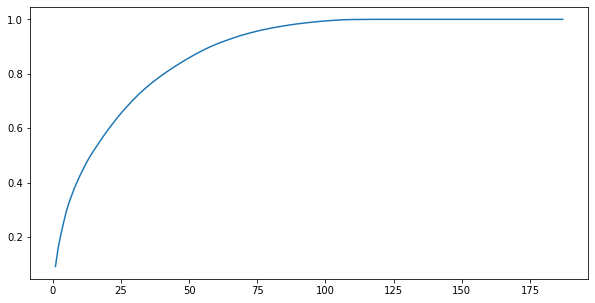

In [129]:
#Scree plot
plt.figure(figsize=(10,5))
plt.plot(range(1,len(var_cumu)+1), var_cumu)

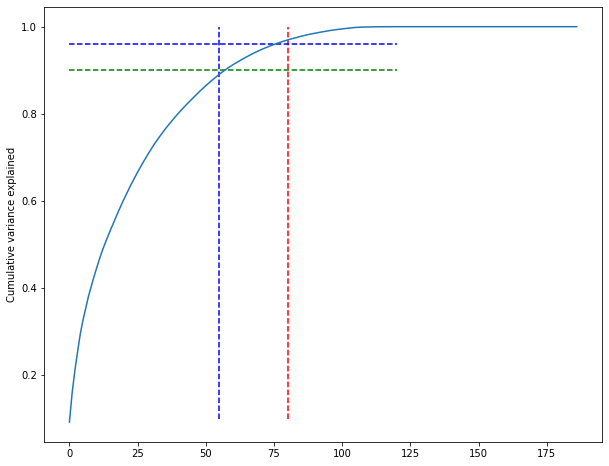

In [130]:
plt.figure(figsize=(10,8))
plt.vlines(x = 80, ymax=1, ymin=0.1, colors="r", linestyles="--")
plt.vlines(x = 55, ymax=1, ymin=0.1, colors="b", linestyles="--")
plt.hlines(y = 0.90, xmax=120, xmin=0, colors="g", linestyles="--")
plt.hlines(y = 0.96, xmax=120, xmin=0, colors="b", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

PCA and Logistic Regression

In [131]:
# create pipeline
PCA_VARS = 57
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [132]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8036393794516539

Evaluate on test data

In [135]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6426 1644]
 [ 126  589]]
Sensitivity: 	0.82
Specificity: 	0.8
AUC:    	 0.87


*Hyperparameter tuning Grid search CV for PCA*

In [138]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [55, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [139]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [55, 80]},
             scoring='roc_auc', verbose=1)

In [140]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.911938,0.046119,0.000000,0.000000,0.1,l1,55,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,1.123058,0.017811,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
2,1.102081,0.046522,0.035666,0.002059,0.1,l2,55,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.878642,0.875709,0.888390,0.886078,0.889312,0.883626,0.005451,10
3,1.458125,0.041448,0.037099,0.002715,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.881576,0.873463,0.893970,0.890580,0.892198,0.886357,0.007733,1
4,0.814573,0.018124,0.000000,0.000000,0.5,l1,55,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
5,1.067503,0.011466,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
6,1.022138,0.030690,0.039826,0.005329,0.5,l2,55,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.877914,0.874788,0.888161,0.886438,0.890087,0.883478,0.006014,13
7,1.383158,0.084183,0.038117,0.002356,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.881509,0.872519,0.892566,0.890765,0.891683,0.885808,0.007744,7
8,0.803423,0.018231,0.000000,0.000000,1,l1,55,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
9,1.096604,0.042673,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28


In [141]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.886357290684184
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [142]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6793 1277]
 [ 148  567]]
Sensitivity: 	0.79
Specificity: 	0.84
AUC:    	 0.88


**Random Forest**

In [144]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [145]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [146]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9309794292966383
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [147]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7954  116]
 [ 358  357]]
Sensitivity: 	0.5
Specificity: 	0.99
AUC:    	 0.93


**The best model is PCA along with Logistic regression compared to Random Forest, as sensitivity is very low.**

**Choosing the best features**

In [148]:
# run a random forest model on train data
# number of variables to consider to split each node
max_features = int(round(np.sqrt(X_train.shape[1])))    
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

14


In [149]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.3s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=14,
                       oob_score=True, random_state=4, verbose=1)

In [150]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[7969  101]
 [ 402  313]]
Sensitivity: 	0.44
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


**Feature Importance**

In [153]:
# OOB score
rf_model.oob_score_

0.9393111523075423

In [152]:
# predictors
features = final_df.drop('target', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,8.800250
1,last_day_rch_amt_8,3.762925
2,total_og_mou_8,3.577061
3,arpu_diff,3.549988
4,total_rech_amt_diff,3.134169
5,total_rech_amt_8,2.972017
6,total_og_mou_diff,2.482416
7,roam_ic_mou_8,2.466169
8,arpu_8,2.375899
9,roam_og_mou_8,2.161485


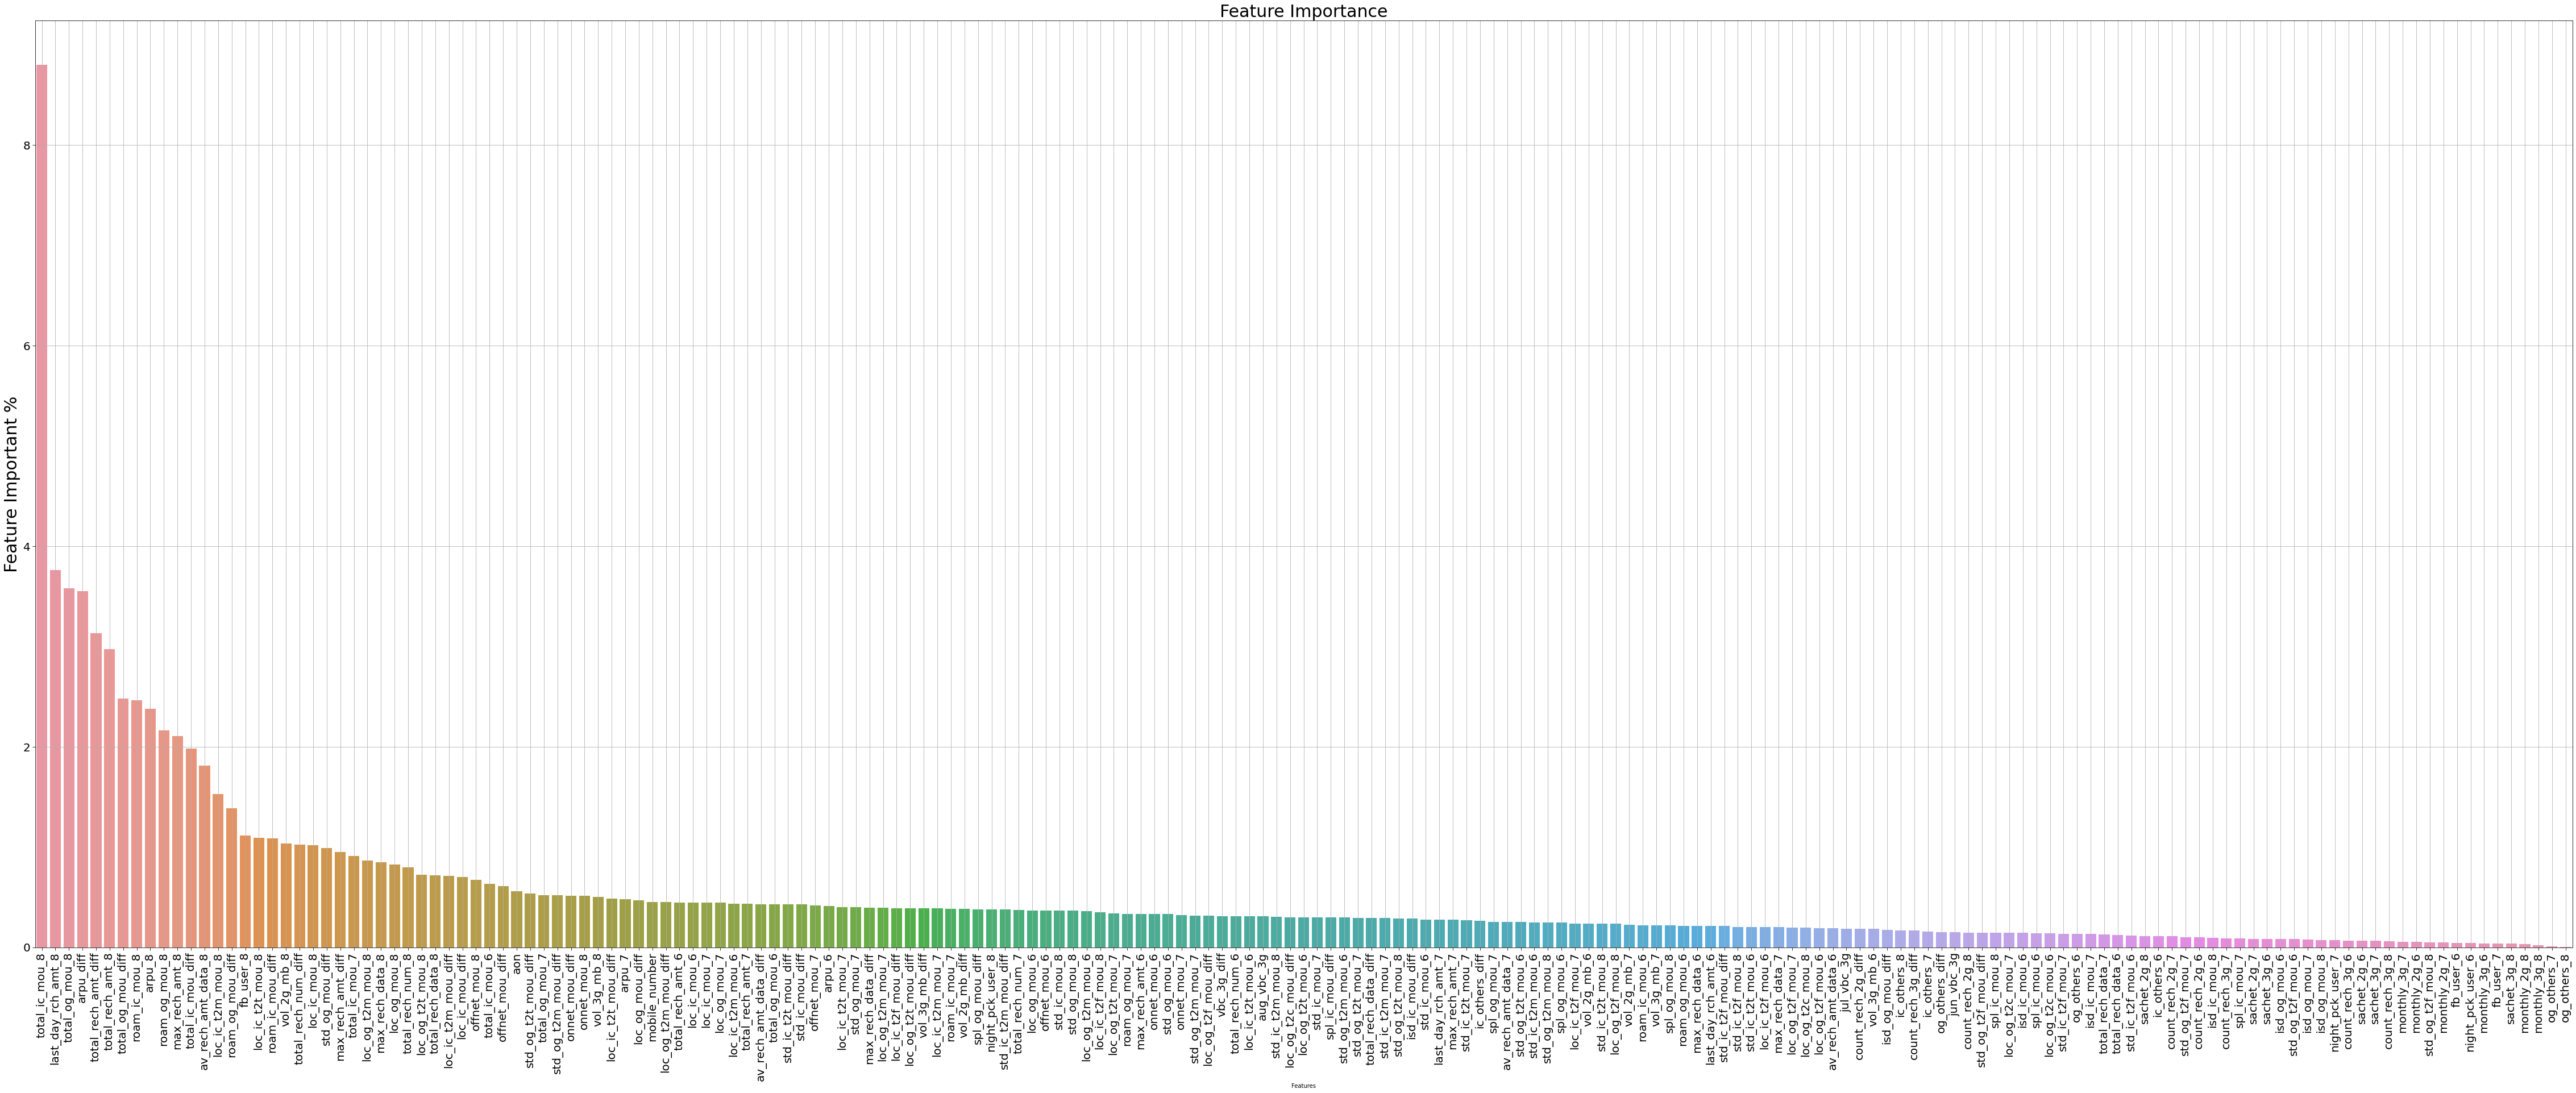

In [181]:
#Plot to show the feature importance of all the  features 
plt.figure(figsize=[80,30])
sns.barplot(x = "variables",y="importance_percentage",data=feature_importance)
plt.title("Feature Importance",size=30)
plt.xticks(rotation="vertical")
plt.ylabel("Feature Important %",size=30)
plt.xlabel("Features",size=10)
plt.tick_params(size=5,labelsize =20) # Tick size in both X and Y axes
plt.grid(0.3)

**Important Features shown in the graph**
***Conclusion***: 
**churn= target**
* Call usage - incoming,outgoing and roaming in the 8th month has impact on churn.
* Average revenue per user more, likely to churn.
* Total rechange amount differnce, there is large differnces in recharge. amount in the month(s) of 6th and 7th are likely to churn.

*Recomendation is Provider should focus on incoming, outgoing calls during roaming and also may need to consider call charges to other operators too.*


